# Introduction

In the interest of understanding whether harm reduction services are actually effective it's worth taking a look at drug use historically. The best data sources around illicit drug use would come from drug arrest records and emergency room admissions. It will also be valuable to take a look at opioid use data which would fall under both legal (prescription) use and illegal recreational/diverted use.

In [4]:
!curl https://data.sfgov.org/api/views/xfre-2aqu/rows.csv?accessType=DOWNLOAD > data/datasf-drug-arrests.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 20.0M    0 20.0M    0     0  4160k      0 --:--:--  0:00:04 --:--:-- 4304k


In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [6]:
df = pd.read_csv("data/datasf-drug-arrests.csv")

In [7]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,PdId
0,180322603,DRUG/NARCOTIC,POSSESSION OF HEROIN,Tuesday,05/01/2018,13:27,SOUTHERN,"ARREST, BOOKED",600 Block of STEVENSON ST,-122.412652,37.779513,18032260316100
1,160355743,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,05/01/2016,08:55,TENDERLOIN,"ARREST, BOOKED",LEAVENWORTH ST / TURK ST,-122.414056,37.782793,16035574316650
2,170019525,DRUG/NARCOTIC,POSSESSION OF BASE/ROCK COCAINE FOR SALE,Saturday,01/07/2017,23:50,NORTHERN,"ARREST, BOOKED",2100 Block of LOMBARD ST,-122.436863,37.799620,17001952516623
3,170899656,DRUG/NARCOTIC,POSSESSION OF CONTROLLED SUBSTANCE FOR SALE,Friday,11/03/2017,21:00,TENDERLOIN,"ARREST, BOOKED",0 Block of JONES ST,-122.412193,37.781605,17089965616662
4,160551399,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,Friday,07/08/2016,08:00,MISSION,"ARREST, BOOKED",0 Block of ALBION ST,-122.423266,37.765650,16055139916010


Let's take the `Date` column and just generate a quick histogram of drug arrests per year.

In [35]:
dates = df["Date"].str.split('/').str[2].astype(int)
dates.sort_values(inplace=True)
year_cts = {}
for year in dates:
    if year not in year_cts.keys():
        year_cts[year] = 1
    else:
        year_cts[year] += 1

print(year_cts)

{2003: 9784, 2004: 9792, 2005: 8444, 2006: 8943, 2007: 10360, 2008: 11456, 2009: 11771, 2010: 9036, 2011: 6802, 2012: 6307, 2013: 6672, 2014: 5324, 2015: 4194, 2016: 4202, 2017: 3265, 2018: 1469}


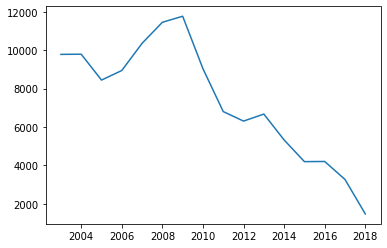

In [38]:
plt.plot(year_cts.keys(), year_cts.values())